## In-class exercise for tutorial 010

In this exercise we will practice making datasets. We will on the one hand simulating data, on the other hand not quite as we will be making some asumptions and simplifaction on the data generation process that will not make the data.

Nestor lives right under the ATX airport, along the routes of airliners from major companies (United, Delt, etc).

Because of that Nestor hears noise. The noise is generated by the airplanes landing and taking off. There is a lot of noise that is generated by these airplanes. One day Nestor decides to simulate the noise generated by the airplanes and reaching his years. [Nestor is worried about his hearing loss](https://www.cdc.gov/niosh/topics/aircrew/noise.html). 

### The problem to simulate

Nestor is interested in calculating how much noise he is being exposed to. So he goes and looks up the timetable during the 3 hours window in the morning, when he is at home, and during the 7 hours window in the evening, when he is at hom, and before midnight when the airport shuts down and no more flights land or takeoff.

Nestor lives about 2 miles away from the airport. At that distance each jet generates about 75-80 dB (Decibels).
We will say 75dB. In the morning there are about 60 airplanes that land/takeoff. Each airplane can be heard consistently for about 7 minutes (we will assume a flat top distribution of the dBs, no ramp up, no decay, a simple flat distribution).

In the 3 hours window of the morning, Airplanes depart and land every 3 minutes, so their noise overlap for about 4 minutes. The dB of an airplane is corrupted by noise due to the city and nature around around, the cars, trains, trucks (all add some noise, randomly) and the position of the moving cloud in the sky, the wind and humidity (all diminish the noise randomly). So the noise is never 75dB but it stays on average around 75 dB while being corrupted by noise.

In the 7 hours window of the evening, Airplanes depart and land about every 4 minutes, so their noise overlaps for about 3 minutes. 

Nestor will assume a linear summation of the airplane noise in a single day. This is not the best way especially when dealing with dB, but this is a simple exercise and we can break some fundamental physics rules to make things easier for us. We will want to simulate the situation. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

How many airplanes depart/land in the morning widow of a single day. How many in the evening window? 

In [3]:
noiseLevel = 75
num_days = 1
LengthofSound = 7 #Sound lasts 7 minutes
LengthofOverlap = 4 #Sounds overlap for 4 minutes
plane_cycle = 10 #duration of plane exposure in hours

planes_per_M = 3 #Land every 3 minutes
Hours_in_M = 3 #3 hours in the morning
num_planes_m = (3*60)/3 #60 planes land in the morning
time_m = 180 #180 Minutes of flight in the morning

planes_per_E = 4 #Land every 4 minutes
Hours_in_E = 7 #7 hours in the eveing
num_planes_e = (7*60)/4 #105 planes land in the evening
time_e = 420 #420 Minutes of flight in the morning

num_planes_tot = 60
measurement_rate_morn = 20 #how many measuerments per hour
measurement_rate_eve = 15 #how many measuerments per hour


Show the noise profile of one airplane in the morning (pure for the moment no corruption but other exsternal noise) 

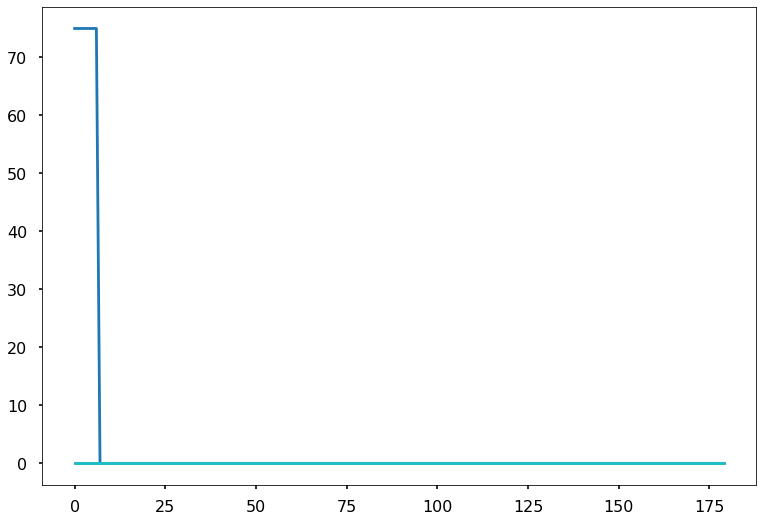

In [40]:
m_plane_noise = np.zeros((time_m, num_planes_tot))
m_plane_noise[:7,0] = noiseLevel

p1 = m_plane_noise[:7,0]

plt.plot(m_plane_noise);

In [41]:
p1

array([75., 75., 75., 75., 75., 75., 75.])

Show the noise profile of the same airplane corrupted by some small noise. 

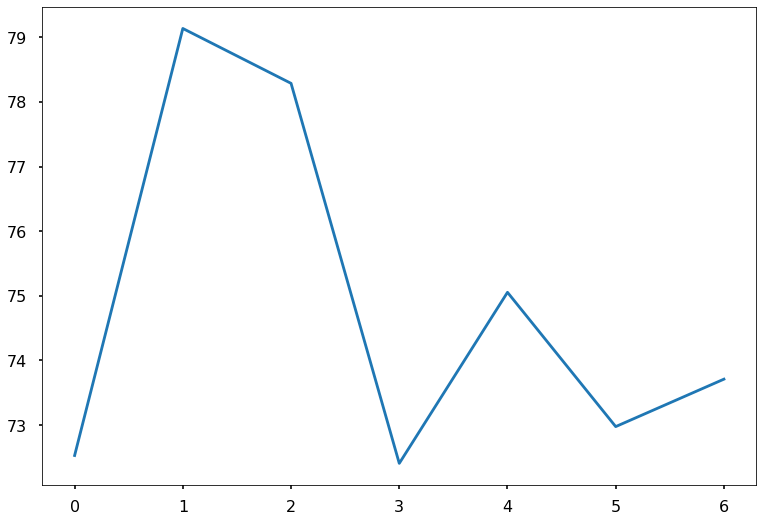

In [42]:
noise_amplitude = 2 # how much the noise disrupts the measurements in dB
measurement_noise = noise_amplitude * np.random.randn(*p1.shape) # Note the `*` is used here for compatibility

p1_noise = p1+measurement_noise
plt.plot(p1_noise);
m_plane_noise[:7,0] = p1_noise


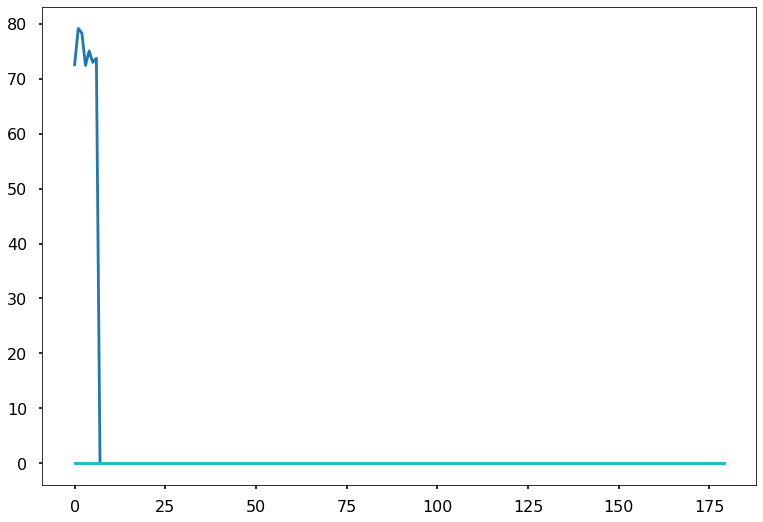

In [43]:
plt.plot(m_plane_noise);

Now add a second airplane, corrupted by noise but departing/landing at a different time. Make a plot of the two airplanes together.

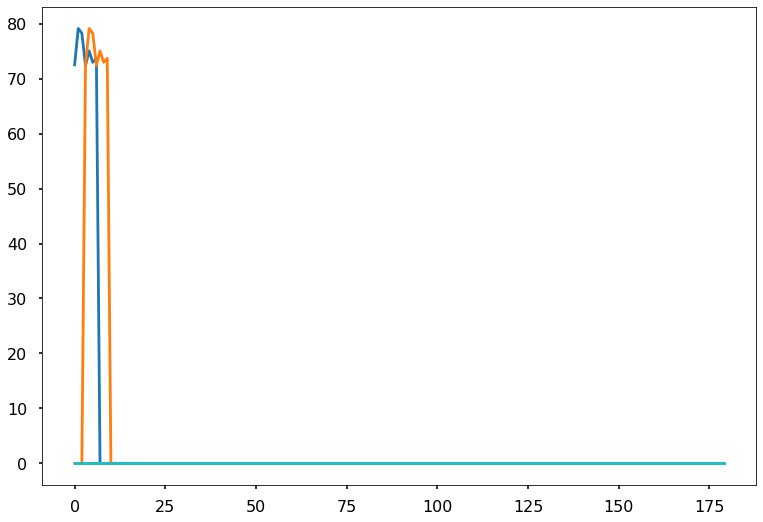

In [44]:
m_plane_noise[3:10,1] = measurement_noise + noiseLevel
plt.plot(m_plane_noise);

Finally, simulate all the the airplanes that you have estimated to land/depart in the morning. Plot them on the same figure.

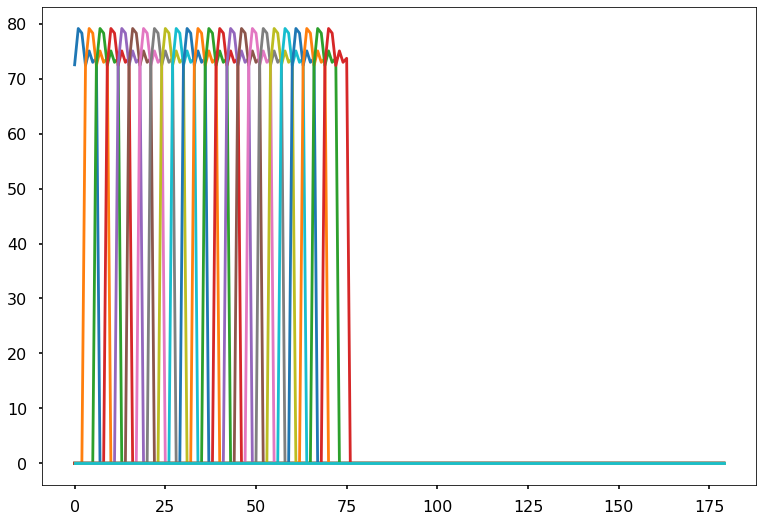

In [47]:
m_plane_noise[6:13,2] = measurement_noise + noiseLevel  
m_plane_noise[9:16,3] = measurement_noise + noiseLevel
m_plane_noise[12:19,4] = measurement_noise + noiseLevel  
m_plane_noise[15:22,5] = measurement_noise + noiseLevel
m_plane_noise[18:25,6] = measurement_noise + noiseLevel  
m_plane_noise[21:28,7] = measurement_noise + noiseLevel
m_plane_noise[24:31,8] = measurement_noise + noiseLevel  
m_plane_noise[27:34,9] = measurement_noise + noiseLevel
m_plane_noise[30:37,10] = measurement_noise + noiseLevel
m_plane_noise[33:40,11] = measurement_noise + noiseLevel
m_plane_noise[36:43,12] = measurement_noise + noiseLevel
m_plane_noise[39:46,13] = measurement_noise + noiseLevel  
m_plane_noise[42:49,14] = measurement_noise + noiseLevel
m_plane_noise[45:52,15] = measurement_noise + noiseLevel  
m_plane_noise[48:55,16] = measurement_noise + noiseLevel
m_plane_noise[51:58,17] = measurement_noise + noiseLevel  
m_plane_noise[54:61,18] = measurement_noise + noiseLevel
m_plane_noise[57:64,19] = measurement_noise + noiseLevel  
m_plane_noise[60:67,20] = measurement_noise + noiseLevel
m_plane_noise[63:70,21] = measurement_noise + noiseLevel
m_plane_noise[66:73,22] = measurement_noise + noiseLevel
m_plane_noise[69:76,23] = measurement_noise + noiseLevel

plt.plot(m_plane_noise);

In [48]:
m_plane_noise[:21,:5]

array([[72.52902628,  0.        ,  0.        ,  0.        ,  0.        ],
       [79.13608238,  0.        ,  0.        ,  0.        ,  0.        ],
       [78.28707696,  0.        ,  0.        ,  0.        ,  0.        ],
       [72.40753809, 72.52902628,  0.        ,  0.        ,  0.        ],
       [75.05382556, 79.13608238,  0.        ,  0.        ,  0.        ],
       [72.97621043, 78.28707696,  0.        ,  0.        ,  0.        ],
       [73.71030693, 72.40753809, 72.52902628,  0.        ,  0.        ],
       [ 0.        , 75.05382556, 79.13608238,  0.        ,  0.        ],
       [ 0.        , 72.97621043, 78.28707696,  0.        ,  0.        ],
       [ 0.        , 73.71030693, 72.40753809, 72.52902628,  0.        ],
       [ 0.        ,  0.        , 75.05382556, 79.13608238,  0.        ],
       [ 0.        ,  0.        , 72.97621043, 78.28707696,  0.        ],
       [ 0.        ,  0.        , 73.71030693, 72.40753809, 72.52902628],
       [ 0.        ,  0.        ,  0. 

Next, let's start with the evening airplanes. Plot 20% of the total airplanes you estimated to depart/land in the evening. Make a plot.

Plot all the evening airplanes.

Combine the full day. Add the morning airplanes to the evening airplanes (hint: make a single numpy array). Plot all airplanes.

Now the simple theory Nestor is using is that the noise will add across all airplanes. So what is the average noise across the morning and evening hours that Nestor is exposed to?

Now use imshow on the full numpy array of all airplane noise. How does it look like?

Simulate the dataset of tutorial009. For this final exercise you can use tutorial009 and repurpose some of the code (for example for plotting). Also, you can use and should the dataset given to youin tutorial 090. Indeed, you will need to figure out how to generate that very same dataset (up to noise differences). Importantly, the dataset you will generate will need to keep a very similar similar Signal-to-Noise ratio of the given dataset. To do this all, try exploring the properties of the given dataset. Then implement code that generates a new dataset with similar dimensions and properties of signal and noise.